Name: Rahul Govindkumar

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import re
import pandas as pd

Numpy is library for scientific computing in Python. It has efficient implementation of n-dimensional array (tensor) manupulations, which is useful for machine learning applications.

In [114]:
import numpy as np

We can convert a list into numpy array (tensor)  

In [115]:
b = [[1, 2, 4], [2, 6, 9]]
a = np.array(b)
a

array([[1, 2, 4],
       [2, 6, 9]])

We can check the dimensions of the array

In [116]:
a.shape

(2, 3)

We can apply simple arithmetic operation on all element of a tensor

In [117]:
a * 3

array([[ 3,  6, 12],
       [ 6, 18, 27]])

You can transpose a tensor
    

In [118]:
print(a.T.shape)
a.T

(3, 2)


array([[1, 2],
       [2, 6],
       [4, 9]])

You can apply aggregate functions on the whole tensor

In [119]:
np.sum(a)

24

or on one dimension of it

In [120]:
np.sum(a, axis=0)

array([ 3,  8, 13])

In [121]:
np.sum(a, axis=1)

array([ 7, 17])

We can do element-wise arithmetic operation on two tensors (of the same size)

In [122]:
c1 = np.array([[1, 2, 4], [2, 6, 9]])
c2 = np.array([[2, 3, 5], [1, 2, 1]])
c1 * c2

array([[ 2,  6, 20],
       [ 2, 12,  9]])

If you want to multiply all columns of a tensor by vector (for example if you want to multiply all data features by their lables) you need a trick. This multiplication shows up in calculating the gradients. 

In [123]:
a = np.array([[1, 2, 4], [2, 6, 9]])
b = np.array([1,-1])
print(a)
print(b)


[[1 2 4]
 [2 6 9]]
[ 1 -1]


Here we want to multiply the first row of a by 1 and the second row of a by -1. Simply multiplying a by b does not work because a and b do not have the same dimension

In [124]:
# a * b

To do this multiplication we first have to assume b has one column and then repeat the column of b with the number of columns in a. We use tile function to do that

In [125]:
b_repeat = np.tile(b,  (a.shape[1],1)).T
print(b_repeat.shape)
b_repeat

(2, 3)


array([[ 1,  1,  1],
       [-1, -1, -1]])

Now we can multiply each column of a by b:

In [126]:
a * b_repeat

array([[ 1,  2,  4],
       [-2, -6, -9]])

You can create inital random vector using numpy (using N(0,1)):

In [127]:
mu = 0 #mean
sigma = 1 #standard deviation
r = np.random.normal(mu,sigma, 1000) #draws 1000 samples from a normal distribution

We can apply functions on tensors

In [128]:
#implementation of Normal distribution
def normal(x, mu, sigma):
    return np.exp( -0.5 * ((x-mu)/sigma)**2)/np.sqrt(2.0*np.pi*sigma**2)

#probability of samples on the Normal distribution
probabilities = normal(r, mu, sigma)

Numpy has useful APIs for analysis. Here we plot the histogram of samples and also plot the probabilies to see if the samples follow the normal distribution.

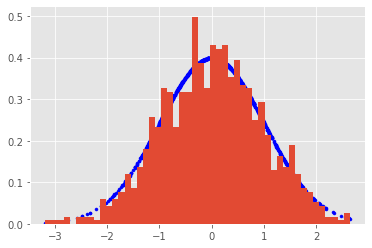

In [129]:
counts, bins = np.histogram(r,50,density=True)
plt.hist(bins[:-1], bins, weights=counts)
plt.scatter(r, probabilities, c='b', marker='.')

In [130]:
def read_data(filename):
    f = open(filename, 'r')
    p = re.compile(',')
    xdata = []
    ydata = []
    header = f.readline().strip()
    varnames = p.split(header)
    namehash = {}
    for l in f:
        li = p.split(l.strip())
        xdata.append([float(x) for x in li[:-1]])
        ydata.append(float(li[-1]))
    
    return np.array(xdata), np.array(ydata)


Assuming our data is x is available in numpy we use numpy to implement logistic regression


In [131]:
(xtrain_whole, ytrain_whole) = read_data('datasets/spambase-train.csv')
(xtest, ytest) = read_data('datasets/spambase-test.csv')

In [132]:
print("The shape of xtrain:", xtrain_whole.shape)
print("The shape of ytrain:", ytrain_whole.shape)
print("The shape of xtest:", xtest.shape)
print("The shape of ytest:", ytest.shape)

The shape of xtrain: (3601, 54)
The shape of ytrain: (3601,)
The shape of xtest: (1000, 54)
The shape of ytest: (1000,)


before training make we normalize the input data (features)

In [133]:
xmean = np.mean(xtrain_whole, axis=0)
xstd = np.std(xtrain_whole, axis=0)
xtrain_normal_whole = (xtrain_whole-xmean) / xstd
xtest_normal = (xtest-xmean) / xstd

We need to create a validation set. We create an array of indecies and permute it.

In [134]:
premute_indicies = np.random.permutation(np.arange(xtrain_whole.shape[0]))

We keep the first 2600 data points as the training data and rest as the validation data 

In [135]:
xtrain_normal = xtrain_normal_whole[premute_indicies[:2600]]
ytrain = ytrain_whole[premute_indicies[:2600]]
xval_normal = xtrain_normal_whole[premute_indicies[2600:]]
yval = ytrain_whole[premute_indicies[2600:]]

Initiallizing the weights and bias with random values from N(0,1)

In [136]:
weights = np.random.normal(0, 1, xtrain_normal.shape[1]);
bias = np.random.normal(0,1,1)

In [137]:
#the sigmoid function
def sigmoid(v):
    #return np.exp(-np.logaddexp(0, -v)) #numerically stable implementation of sigmoid function 
    return 1.0 / (1+np.exp(-v))

We can use dot-product from numpy to calculate the margin and pass it to the sigmoid function

In [138]:
#w: weight vector (numpy array of size n)
#b: numpy array of size 1
#returns p(y=1|x, w, b)
def prob(x, w, b):
    return sigmoid(np.dot(x,w) + b);

You can also calculate $l_2$ penalty using linalg library of numpy 

In [139]:
np.linalg.norm(weights)

6.742391924271915

$$\text{Cross Entropy Loss} = -\frac{1}{|D|}[\sum_{(y^i,\mathbf{x}^i)\in\mathcal{D}} 
 y^i \log p(y=1|\mathbf{x}^i;\mathbf{w},b)  +  (1-y^i) \log (1 - p(y=1|\mathbf{x}^i;\mathbf{w},b))]+\frac{\lambda}{2} \|\mathbf{w}\|^2 $$

In [140]:
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns the cross entropy loss
def loss(w, y_prob, y_true, lambda_):
    
    n_sample=len(w)
    
    cross_entropy_Loss=-(1/abs(n_sample))*np.sum((y_true * np.log(y_prob + 0.0000000000000000001)) + (1-y_true)*np.log(1-y_prob + 0.0000000000000000001)) + lambda_*0.5*np.linalg.norm(w)
    
    return cross_entropy_Loss
    

In [141]:
#x: input variables (data of size m x n with m data point and n features)
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns tuple of gradient w.r.t w and w.r.t to bias

def grad_w_b(x, w, y_prob, y_true, lambda_):
    
    n_samples=len(x)
#     grad_w = np.zeros(w.shape)
#     grad_b = 0.0
    
    grad_w = (1/n_samples) * np.dot(x.T, (y_prob - y_true))
    grad_b = (1/n_samples) * np.sum(y_prob -y_true)
    
    
    
    return (grad_w,grad_b)

In [142]:
#x: input variables (data of size m x n with m data point and n features)
#w: weight vector (numpy array of size n)
#y_prob: p(y|x, w, b)
#y_true: class variable data
#lambda_: l2 penalty coefficient
#returns tuple of gradient w.r.t w and w.r.t to bias

def second_grad_w(x, w, y_prob, y_true, lambda_):
    n_sample = len(x)
    second_grad_w = np.zeros(w.shape)
    second_grad_b = 0.0
    second_grad_w = (1/n_sample) * -1 * np.dot(np.dot(x.T,x), np.dot(y_prob,(1-y_prob) ))
    second_grad_b = y_prob - y_true
    return (second_grad_w,second_grad_b)

In [143]:
cost_list=[]

In [144]:

#lambda_ is the coeffienct of l2 norm penalty
#learning_rate is learning rate of gradient descent algorithm
#max_iter determines the maximum number of iterations if the gradients descent does not converge.
#continue the training while gradient > 0.1 or the number steps is less max_iter

#returns model as tuple of (weights,bias)

def fit(x, y_true, learning_rate, lambda_, max_iter, verbose=0):
    weights = np.random.normal(0, 1, x.shape[1]);
    bias = np.random.normal(0,1,1)
    
    for i in range (max_iter):
        
        y_prod = prob(x, weights, bias)
        dw,db = grad_w_b(x, weights, y_prod, y_true, lambda_)
        
        H, second_db =  second_grad_w(x,weights,y_prod,y_true,lambda_)
        second_gradident = np.dot(np.linalg.inv(H),dw)
        
        weight_old = weights
        weights += second_gradident
        
        cross_loss = loss(weights, y_prod, y_true, lambda_)
        
        # #         H_inv = np.linalg.inv(H)*(dw)
        
# #         H_ingradv = 1/(H)*(dw)
#         weights = weights + np.dot(np.linalg.inv(H), dw)
# #         weights = weights - (np.array([grad])).T
# #         bias = bias - learning_rate * db
        
        
# #         if(diff <= diffThreshHold or iteration > maxIteration):
# #             break


        if verbose:
            print("Iteration Number: "+str(i)+"\nLoss: "+ str(cross_loss)+"\nl2 norm of gradients: "+str(np.linalg.norm(dw))+"\nl2 norm of weights: "+str(np.linalg.norm(weights)))
            print("---------------------")
            cost_list.append(cross_loss)
    #change the condition appropriately
#     while True:
        
#         if verbose: #verbose is used for debugging purposes
#             #print iteration number, loss, l2 norm of gradients, l2 norm of weights
#             pass
    return (weights, bias)

In [145]:
def accuracy(x, y_true, model):
    w, b = model
    return np.sum((prob(x, w, b)>0.5).astype(np.double) == y_true)  / y_true.shape[0]

In [146]:
learning_rate = 0.001
lambda_ = 1.0
max_iter = 10000
model = fit(xtrain_normal, ytrain, learning_rate, lambda_, max_iter, verbose=1) #keep the verbose on here for your submissions

Iteration Number: 0
Loss: 104.73476703485291
l2 norm of gradients: 0.9574963604652689
l2 norm of weights: 7.187806999686712
---------------------
Iteration Number: 1
Loss: 104.67191021481929
l2 norm of gradients: 0.9572160215495435
l2 norm of weights: 7.185626093478667
---------------------
Iteration Number: 2
Loss: 104.60909534461909
l2 norm of gradients: 0.9569356860230818
l2 norm of weights: 7.183446134562879
---------------------
Iteration Number: 3
Loss: 104.54632239787972
l2 norm of gradients: 0.9566553539330455
l2 norm of weights: 7.181267122411418
---------------------
Iteration Number: 4
Loss: 104.48359134820552
l2 norm of gradients: 0.9563750253271222
l2 norm of weights: 7.179089056494968
---------------------
Iteration Number: 5
Loss: 104.42090216915959
l2 norm of gradients: 0.9560947002535223
l2 norm of weights: 7.1769119362828375
---------------------
Iteration Number: 6
Loss: 104.35825483425808
l2 norm of gradients: 0.9558143787609775
l2 norm of weights: 7.174735761242965

Iteration Number: 339
Loss: 85.64727607976766
l2 norm of gradients: 0.8631612920539742
l2 norm of weights: 6.49890504630308
---------------------
Iteration Number: 340
Loss: 85.5970055079099
l2 norm of gradients: 0.8628869248143525
l2 norm of weights: 6.497010672223252
---------------------
Iteration Number: 341
Loss: 85.54676723833701
l2 norm of gradients: 0.8626125914899272
l2 norm of weights: 6.495117042047016
---------------------
Iteration Number: 342
Loss: 85.49656124495493
l2 norm of gradients: 0.8623382921621039
l2 norm of weights: 6.493224155261543
---------------------
Iteration Number: 343
Loss: 85.44638750171903
l2 norm of gradients: 0.8620640269119592
l2 norm of weights: 6.491332011355213
---------------------
Iteration Number: 344
Loss: 85.39624598260058
l2 norm of gradients: 0.8617897958202382
l2 norm of weights: 6.489440609817623
---------------------
Iteration Number: 345
Loss: 85.34613666161371
l2 norm of gradients: 0.861515598967354
l2 norm of weights: 6.487549950139

Iteration Number: 704
Loss: 69.26071381671434
l2 norm of gradients: 0.765658649351803
l2 norm of weights: 5.853641075605991
---------------------
Iteration Number: 705
Loss: 69.2207830609237
l2 norm of gradients: 0.7653991877810941
l2 norm of weights: 5.851993677291704
---------------------
Iteration Number: 706
Loss: 69.18087731488691
l2 norm of gradients: 0.7651397673254641
l2 norm of weights: 5.850346909331719
---------------------
Iteration Number: 707
Loss: 69.14099656322507
l2 norm of gradients: 0.7648803879630977
l2 norm of weights: 5.848700771549591
---------------------
Iteration Number: 708
Loss: 69.10114079057514
l2 norm of gradients: 0.7646210496721071
l2 norm of weights: 5.847055263769159
---------------------
Iteration Number: 709
Loss: 69.06130998158758
l2 norm of gradients: 0.7643617524305346
l2 norm of weights: 5.845410385814539
---------------------
Iteration Number: 710
Loss: 69.02150412091997
l2 norm of gradients: 0.7641024962163527
l2 norm of weights: 5.84376613751

Iteration Number: 1055
Loss: 56.67814419725923
l2 norm of gradients: 0.6769358433484681
l2 norm of weights: 5.312976374474926
---------------------
Iteration Number: 1056
Loss: 56.64612282564316
l2 norm of gradients: 0.6766892649663817
l2 norm of weights: 5.311540630832831
---------------------
Iteration Number: 1057
Loss: 56.61412169020668
l2 norm of gradients: 0.6764427187949917
l2 norm of weights: 5.3101054657027245
---------------------
Iteration Number: 1058
Loss: 56.582140778963726
l2 norm of gradients: 0.6761962048127784
l2 norm of weights: 5.30867087896337
---------------------
Iteration Number: 1059
Loss: 56.55018007992993
l2 norm of gradients: 0.6759497229983198
l2 norm of weights: 5.307236870493684
---------------------
Iteration Number: 1060
Loss: 56.51823958113027
l2 norm of gradients: 0.6757032733302921
l2 norm of weights: 5.305803440172733
---------------------
Iteration Number: 1061
Loss: 56.48631927060348
l2 norm of gradients: 0.6754568557874709
l2 norm of weights: 5.3

Iteration Number: 1413
Loss: 46.42189907855173
l2 norm of gradients: 0.5906556305756365
l2 norm of weights: 4.8351181719177205
---------------------
Iteration Number: 1414
Loss: 46.39641308891713
l2 norm of gradients: 0.5904203769629313
l2 norm of weights: 4.83388278186113
---------------------
Iteration Number: 1415
Loss: 46.37094350950112
l2 norm of gradients: 0.5901851580096541
l2 norm of weights: 4.8326479353990335
---------------------
Iteration Number: 1416
Loss: 46.34549033083983
l2 norm of gradients: 0.5899499737492374
l2 norm of weights: 4.831413632462049
---------------------
Iteration Number: 1417
Loss: 46.32005354347268
l2 norm of gradients: 0.5897148242151842
l2 norm of weights: 4.830179872981012
---------------------
Iteration Number: 1418
Loss: 46.294633137947734
l2 norm of gradients: 0.5894797094410681
l2 norm of weights: 4.82894665688697
---------------------
Iteration Number: 1419
Loss: 46.26922910482113
l2 norm of gradients: 0.5892446294605316
l2 norm of weights: 4.8

Iteration Number: 1799
Loss: 37.72066034579782
l2 norm of gradients: 0.5027402953969067
l2 norm of weights: 4.39821137328651
---------------------
Iteration Number: 1800
Loss: 37.70087951932962
l2 norm of gradients: 0.5025207481923841
l2 norm of weights: 4.397182993215528
---------------------
Iteration Number: 1801
Loss: 37.681112036281014
l2 norm of gradients: 0.5023012456162139
l2 norm of weights: 4.396155148201922
---------------------
Iteration Number: 1802
Loss: 37.661357890250876
l2 norm of gradients: 0.502081787672669
l2 norm of weights: 4.395127838266111
---------------------
Iteration Number: 1803
Loss: 37.6416170748462
l2 norm of gradients: 0.5018623743658983
l2 norm of weights: 4.394101063428644
---------------------
Iteration Number: 1804
Loss: 37.621889583681856
l2 norm of gradients: 0.5016430056999287
l2 norm of weights: 4.393074823710197
---------------------
Iteration Number: 1805
Loss: 37.602175410378656
l2 norm of gradients: 0.5014236816786642
l2 norm of weights: 4.3

Iteration Number: 2120
Loss: 32.02390382039166
l2 norm of gradients: 0.4345498783649106
l2 norm of weights: 4.095710558759334
---------------------
Iteration Number: 2121
Loss: 32.00810707048913
l2 norm of gradients: 0.43434457588527403
l2 norm of weights: 4.094855060824997
---------------------
Iteration Number: 2122
Loss: 31.992321851595307
l2 norm of gradients: 0.4341393180994555
l2 norm of weights: 4.094000103117955
---------------------
Iteration Number: 2123
Loss: 31.97654815835689
l2 norm of gradients: 0.4339341050232991
l2 norm of weights: 4.093145685623551
---------------------
Iteration Number: 2124
Loss: 31.960785985418763
l2 norm of gradients: 0.4337289366728654
l2 norm of weights: 4.092291808326785
---------------------
Iteration Number: 2125
Loss: 31.945035327425053
l2 norm of gradients: 0.43352381306443316
l2 norm of weights: 4.091438471212322
---------------------
Iteration Number: 2126
Loss: 31.929296179018838
l2 norm of gradients: 0.43331873421449957
l2 norm of weight

Iteration Number: 2483
Loss: 27.003346180896067
l2 norm of gradients: 0.3632555273354198
l2 norm of weights: 3.820272631653918
---------------------
Iteration Number: 2484
Loss: 26.99136422256349
l2 norm of gradients: 0.3630693276048059
l2 norm of weights: 3.8196092425307953
---------------------
Iteration Number: 2485
Loss: 26.9793916838875
l2 norm of gradients: 0.3628831927049943
l2 norm of weights: 3.8189463631296725
---------------------
Iteration Number: 2486
Loss: 26.967428558598826
l2 norm of gradients: 0.3626971227158128
l2 norm of weights: 3.818283993301056
---------------------
Iteration Number: 2487
Loss: 26.95547484042669
l2 norm of gradients: 0.3625111177170763
l2 norm of weights: 3.8176221328951607
---------------------
Iteration Number: 2488
Loss: 26.94353052309947
l2 norm of gradients: 0.3623251777885854
l2 norm of weights: 3.8169607817619133
---------------------
Iteration Number: 2489
Loss: 26.931595600344238
l2 norm of gradients: 0.36213930301012554
l2 norm of weight

Iteration Number: 2752
Loss: 24.09957604185908
l2 norm of gradients: 0.31574448739796884
l2 norm of weights: 3.6596601142984877
---------------------
Iteration Number: 2753
Loss: 24.089901921624207
l2 norm of gradients: 0.31557831703957695
l2 norm of weights: 3.659127651994321
---------------------
Iteration Number: 2754
Loss: 24.080235546619328
l2 norm of gradients: 0.31541222903987765
l2 norm of weights: 3.6585956505979054
---------------------
Iteration Number: 2755
Loss: 24.070576910840792
l2 norm of gradients: 0.3152462234404379
l2 norm of weights: 3.6580641099004394
---------------------
Iteration Number: 2756
Loss: 24.060926008287222
l2 norm of gradients: 0.31508030028261846
l2 norm of weights: 3.6575330296929423
---------------------
Iteration Number: 2757
Loss: 24.05128283296035
l2 norm of gradients: 0.3149144596075736
l2 norm of weights: 3.65700240976625
---------------------
Iteration Number: 2758
Loss: 24.04164737886403
l2 norm of gradients: 0.31474870145625145
l2 norm of w

Iteration Number: 3108
Loss: 21.10218680431039
l2 norm of gradients: 0.2619743253444549
l2 norm of weights: 3.497555785041176
---------------------
Iteration Number: 3109
Loss: 21.094912919473273
l2 norm of gradients: 0.26183869211163757
l2 norm of weights: 3.497172919308751
---------------------
Iteration Number: 3110
Loss: 21.08764483452072
l2 norm of gradients: 0.26170314466792166
l2 norm of weights: 3.4967904295172287
---------------------
Iteration Number: 3111
Loss: 21.080382544546666
l2 norm of gradients: 0.2615676829976895
l2 norm of weights: 3.4964083154029444
---------------------
Iteration Number: 3112
Loss: 21.073126044648255
l2 norm of gradients: 0.2614323070852209
l2 norm of weights: 3.496026576702147
---------------------
Iteration Number: 3113
Loss: 21.065875329925483
l2 norm of gradients: 0.2612970169146935
l2 norm of weights: 3.4956452131509974
---------------------
Iteration Number: 3114
Loss: 21.05863039548138
l2 norm of gradients: 0.2611618124701828
l2 norm of weig

Iteration Number: 3449
Loss: 18.927550980286703
l2 norm of gradients: 0.22054556189831692
l2 norm of weights: 3.387044123420714
---------------------
Iteration Number: 3450
Loss: 18.921990305275674
l2 norm of gradients: 0.22043772014711546
l2 norm of weights: 3.3867740149317496
---------------------
Iteration Number: 3451
Loss: 18.91643393318803
l2 norm of gradients: 0.2203299541923145
l2 norm of weights: 3.3865041924318025
---------------------
Iteration Number: 3452
Loss: 18.91088186016025
l2 norm of gradients: 0.2202222639936576
l2 norm of weights: 3.3862346556722107
---------------------
Iteration Number: 3453
Loss: 18.905334082332207
l2 norm of gradients: 0.22011464951083776
l2 norm of weights: 3.38596540440448
---------------------
Iteration Number: 3454
Loss: 18.8997905958467
l2 norm of gradients: 0.22000711070349774
l2 norm of weights: 3.3856964383802866
---------------------
Iteration Number: 3455
Loss: 18.89425139684998
l2 norm of gradients: 0.21989964753122998
l2 norm of wei

Iteration Number: 3789
Loss: 17.261555953041675
l2 norm of gradients: 0.18796287479976198
l2 norm of weights: 3.3101808334343628
---------------------
Iteration Number: 3790
Loss: 17.257256304094636
l2 norm of gradients: 0.18787822113023314
l2 norm of weights: 3.3099949230800365
---------------------
Iteration Number: 3791
Loss: 17.252959827875408
l2 norm of gradients: 0.18779362743342967
l2 norm of weights: 3.309809225947314
---------------------
Iteration Number: 3792
Loss: 17.24866652159603
l2 norm of gradients: 0.1877090936587454
l2 norm of weights: 3.3096237418591503
---------------------
Iteration Number: 3793
Loss: 17.24437638247147
l2 norm of gradients: 0.1876246197555626
l2 norm of weights: 3.309438470638712
---------------------
Iteration Number: 3794
Loss: 17.24008940771983
l2 norm of gradients: 0.18754020567325164
l2 norm of weights: 3.3092534121093733
---------------------
Iteration Number: 3795
Loss: 17.235805594562244
l2 norm of gradients: 0.18745585136117146
l2 norm of 

Iteration Number: 4056
Loss: 16.21808699416631
l2 norm of gradients: 0.16732971272952404
l2 norm of weights: 3.2675999978538526
---------------------
Iteration Number: 4057
Loss: 16.214544728728495
l2 norm of gradients: 0.16725925371171452
l2 norm of weights: 3.267465339209163
---------------------
Iteration Number: 4058
Loss: 16.21100499533496
l2 norm of gradients: 0.16718884097199602
l2 norm of weights: 3.2673308531986467
---------------------
Iteration Number: 4059
Loss: 16.207467791958177
l2 norm of gradients: 0.16711847445919462
l2 norm of weights: 3.267196539692342
---------------------
Iteration Number: 4060
Loss: 16.20393311657329
l2 norm of gradients: 0.16704815412214336
l2 norm of weights: 3.2670623985604306
---------------------
Iteration Number: 4061
Loss: 16.20040096715806
l2 norm of gradients: 0.1669778799096823
l2 norm of weights: 3.2669284296732295
---------------------
Iteration Number: 4062
Loss: 16.196871341692876
l2 norm of gradients: 0.16690765177065875
l2 norm of 

Iteration Number: 4440
Loss: 15.027251375050977
l2 norm of gradients: 0.14321045573779528
l2 norm of weights: 3.2274774912013293
---------------------
Iteration Number: 4441
Loss: 15.024554772954168
l2 norm of gradients: 0.14315416460465974
l2 norm of weights: 3.227400666756356
---------------------
Iteration Number: 4442
Loss: 15.02186009429198
l2 norm of gradients: 0.14309790168238568
l2 norm of weights: 3.227323973183878
---------------------
Iteration Number: 4443
Loss: 15.019167337852329
l2 norm of gradients: 0.14304166693180634
l2 norm of weights: 3.2272474103917297
---------------------
Iteration Number: 4444
Loss: 15.016476502424686
l2 norm of gradients: 0.14298546031381898
l2 norm of weights: 3.2271709782878135
---------------------
Iteration Number: 4445
Loss: 15.013787586799921
l2 norm of gradients: 0.14292928178938472
l2 norm of weights: 3.2270946767800965
---------------------
Iteration Number: 4446
Loss: 15.011100589770482
l2 norm of gradients: 0.14287313131952892
l2 norm

Iteration Number: 4805
Loss: 14.161898210901077
l2 norm of gradients: 0.12427750922691032
l2 norm of weights: 3.2074334994379536
---------------------
Iteration Number: 4806
Loss: 14.159832246166044
l2 norm of gradients: 0.12422952543598632
l2 norm of weights: 3.207398795412031
---------------------
Iteration Number: 4807
Loss: 14.15776782999589
l2 norm of gradients: 0.12418156077417772
l2 norm of weights: 3.2073641924051426
---------------------
Iteration Number: 4808
Loss: 14.155704961469402
l2 norm of gradients: 0.12413361523189052
l2 norm of weights: 3.207329690344602
---------------------
Iteration Number: 4809
Loss: 14.153643639665557
l2 norm of gradients: 0.12408568879960878
l2 norm of weights: 3.2072952891577637
---------------------
Iteration Number: 4810
Loss: 14.15158386366353
l2 norm of gradients: 0.12403778146789422
l2 norm of weights: 3.2072609887720276
---------------------
Iteration Number: 4811
Loss: 14.149525632542755
l2 norm of gradients: 0.12398989322738639
l2 norm 

Iteration Number: 5184
Loss: 13.481608309088658
l2 norm of gradients: 0.10743151218410826
l2 norm of weights: 3.2008964286312502
---------------------
Iteration Number: 5185
Loss: 13.480063921960951
l2 norm of gradients: 0.10739065623945919
l2 norm of weights: 3.200895156269215
---------------------
Iteration Number: 5186
Loss: 13.478520737740128
l2 norm of gradients: 0.10734981986968263
l2 norm of weights: 3.200893960055365
---------------------
Iteration Number: 5187
Loss: 13.476978755512121
l2 norm of gradients: 0.10730900308224824
l2 norm of weights: 3.2008928399298555
---------------------
Iteration Number: 5188
Loss: 13.475437974362881
l2 norm of gradients: 0.10726820588463357
l2 norm of weights: 3.200891795832862
---------------------
Iteration Number: 5189
Loss: 13.473898393378388
l2 norm of gradients: 0.10722742828432413
l2 norm of weights: 3.2008908277045864
---------------------
Iteration Number: 5190
Loss: 13.472360011644655
l2 norm of gradients: 0.10718667028881304
l2 norm

Iteration Number: 5506
Loss: 13.041480689304892
l2 norm of gradients: 0.09532709902231648
l2 norm of weights: 3.204101799717541
---------------------
Iteration Number: 5507
Loss: 13.040276958957111
l2 norm of gradients: 0.0952928969537032
l2 norm of weights: 3.2041220725259856
---------------------
Iteration Number: 5508
Loss: 13.039074144100047
l2 norm of gradients: 0.095258716314648
l2 norm of weights: 3.2041424033036123
---------------------
Iteration Number: 5509
Loss: 13.037872243884035
l2 norm of gradients: 0.09522455710671662
l2 norm of weights: 3.2041627919972746
---------------------
Iteration Number: 5510
Loss: 13.036671257459892
l2 norm of gradients: 0.0951904193314381
l2 norm of weights: 3.204183238553846
---------------------
Iteration Number: 5511
Loss: 13.035471183978757
l2 norm of gradients: 0.09515630299030467
l2 norm of weights: 3.204203742920223
---------------------
Iteration Number: 5512
Loss: 13.034272022592216
l2 norm of gradients: 0.09512220808477166
l2 norm of 

Iteration Number: 5858
Loss: 12.668499385077556
l2 norm of gradients: 0.08459945639308235
l2 norm of weights: 3.2144507351840117
---------------------
Iteration Number: 5859
Loss: 12.66756896788753
l2 norm of gradients: 0.08457262591803015
l2 norm of weights: 3.2144883037806564
---------------------
Iteration Number: 5860
Loss: 12.666639198948266
l2 norm of gradients: 0.08454581517901
l2 norm of weights: 3.214525913180981
---------------------
Iteration Number: 5861
Loss: 12.665710077605137
l2 norm of gradients: 0.08451902416572123
l2 norm of weights: 3.214563563341192
---------------------
Iteration Number: 5862
Loss: 12.664781603204219
l2 norm of gradients: 0.08449225286784073
l2 norm of weights: 3.2146012542175293
---------------------
Iteration Number: 5863
Loss: 12.663853775092184
l2 norm of gradients: 0.08446550127502295
l2 norm of weights: 3.21463898576626
---------------------
Iteration Number: 5864
Loss: 12.662926592616348
l2 norm of gradients: 0.08443876937690001
l2 norm of w

Iteration Number: 6189
Loss: 12.392323565964448
l2 norm of gradients: 0.07672645848530868
l2 norm of weights: 3.228867562134083
---------------------
Iteration Number: 6190
Loss: 12.39157571309947
l2 norm of gradients: 0.07670550486499314
l2 norm of weights: 3.228916433425067
---------------------
Iteration Number: 6191
Loss: 12.390828325577846
l2 norm of gradients: 0.07668456683865045
l2 norm of weights: 3.2289653327443837
---------------------
Iteration Number: 6192
Loss: 12.390081402944054
l2 norm of gradients: 0.07666364439287623
l2 norm of weights: 3.2290142600586336
---------------------
Iteration Number: 6193
Loss: 12.389334944743094
l2 norm of gradients: 0.07664273751426737
l2 norm of weights: 3.229063215334449
---------------------
Iteration Number: 6194
Loss: 12.388588950520543
l2 norm of gradients: 0.07662184618942215
l2 norm of weights: 3.229112198538491
---------------------
Iteration Number: 6195
Loss: 12.387843419822483
l2 norm of gradients: 0.07660097040494022
l2 norm o

Iteration Number: 6476
Loss: 12.195152993012934
l2 norm of gradients: 0.0713014646009275
l2 norm of weights: 3.2439218618330092
---------------------
Iteration Number: 6477
Loss: 12.194521956692432
l2 norm of gradients: 0.07128445168419989
l2 norm of weights: 3.2439775202627104
---------------------
Iteration Number: 6478
Loss: 12.193891275084802
l2 norm of gradients: 0.07126745070456415
l2 norm of weights: 3.2440331983140416
---------------------
Iteration Number: 6479
Loss: 12.193260947868025
l2 norm of gradients: 0.0712504616502929
l2 norm of weights: 3.2440888959615797
---------------------
Iteration Number: 6480
Loss: 12.192630974720519
l2 norm of gradients: 0.0712334845096674
l2 norm of weights: 3.244144613179927
---------------------
Iteration Number: 6481
Loss: 12.192001355321047
l2 norm of gradients: 0.07121651927097761
l2 norm of weights: 3.2442003499437106
---------------------
Iteration Number: 6482
Loss: 12.191372089348784
l2 norm of gradients: 0.0711995659225221
l2 norm o

Iteration Number: 6810
Loss: 12.00231528621618
l2 norm of gradients: 0.06621540743131464
l2 norm of weights: 3.2634584340986375
---------------------
Iteration Number: 6811
Loss: 12.001786997530845
l2 norm of gradients: 0.06620178515283565
l2 norm of weights: 3.263519374433239
---------------------
Iteration Number: 6812
Loss: 12.001258975044562
l2 norm of gradients: 0.06618817140134231
l2 norm of weights: 3.2635803271493056
---------------------
Iteration Number: 6813
Loss: 12.000731218541903
l2 norm of gradients: 0.06617456616815462
l2 norm of weights: 3.2636412922285416
---------------------
Iteration Number: 6814
Loss: 12.000203727807714
l2 norm of gradients: 0.06616096944460152
l2 norm of weights: 3.26370226965267
---------------------
Iteration Number: 6815
Loss: 11.999676502627095
l2 norm of gradients: 0.06614738122202068
l2 norm of weights: 3.2637632594034307
---------------------
Iteration Number: 6816
Loss: 11.999149542785359
l2 norm of gradients: 0.06613380149175864
l2 norm 

Iteration Number: 7150
Loss: 11.836766632887894
l2 norm of gradients: 0.06202351112167154
l2 norm of weights: 3.2847820863641037
---------------------
Iteration Number: 7151
Loss: 11.8363179139114
l2 norm of gradients: 0.06201234206067779
l2 norm of weights: 3.2848462892298804
---------------------
Iteration Number: 7152
Loss: 11.835869400528255
l2 norm of gradients: 0.062001179047340337
l2 norm of weights: 3.284910499181561
---------------------
Iteration Number: 7153
Loss: 11.835421092592307
l2 norm of gradients: 0.06199002207564485
l2 norm of weights: 3.2849747162060052
---------------------
Iteration Number: 7154
Loss: 11.834972989957546
l2 norm of gradients: 0.06197887113958372
l2 norm of weights: 3.2850389402900855
---------------------
Iteration Number: 7155
Loss: 11.83452509247814
l2 norm of gradients: 0.061967726233156065
l2 norm of weights: 3.2851031714206846
---------------------
Iteration Number: 7156
Loss: 11.834077400008395
l2 norm of gradients: 0.06195658735036789
l2 nor

Iteration Number: 7477
Loss: 11.700218816233244
l2 norm of gradients: 0.05866182893436829
l2 norm of weights: 3.306083788470541
---------------------
Iteration Number: 7478
Loss: 11.699830369077839
l2 norm of gradients: 0.05865235314855163
l2 norm of weights: 3.3061496755744515
---------------------
Iteration Number: 7479
Loss: 11.699442087149169
l2 norm of gradients: 0.05864288176981624
l2 norm of weights: 3.306215566075155
---------------------
Iteration Number: 7480
Loss: 11.699053970343556
l2 norm of gradients: 0.05863341479404481
l2 norm of weights: 3.3062814599630554
---------------------
Iteration Number: 7481
Loss: 11.698666018557391
l2 norm of gradients: 0.058623952217124846
l2 norm of weights: 3.3063473572285638
---------------------
Iteration Number: 7482
Loss: 11.698278231687198
l2 norm of gradients: 0.05861449403494874
l2 norm of weights: 3.306413257862103
---------------------
Iteration Number: 7483
Loss: 11.6978906096296
l2 norm of gradients: 0.05860504024341377
l2 norm 

Iteration Number: 7838
Loss: 11.569985290905722
l2 norm of gradients: 0.055498573488550466
l2 norm of weights: 3.3300211760894123
---------------------
Iteration Number: 7839
Loss: 11.569650471159681
l2 norm of gradients: 0.05549045560279547
l2 norm of weights: 3.3300877323306417
---------------------
Iteration Number: 7840
Loss: 11.569315784991222
l2 norm of gradients: 0.055482340916701324
l2 norm of weights: 3.3301542890458693
---------------------
Iteration Number: 7841
Loss: 11.568981232326456
l2 norm of gradients: 0.05547422942759999
l2 norm of weights: 3.3302208462283587
---------------------
Iteration Number: 7842
Loss: 11.568646813091565
l2 norm of gradients: 0.05546612113282676
l2 norm of weights: 3.3302874038713783
---------------------
Iteration Number: 7843
Loss: 11.568312527212793
l2 norm of gradients: 0.055458016029720066
l2 norm of weights: 3.330353961968204
---------------------
Iteration Number: 7844
Loss: 11.567978374616454
l2 norm of gradients: 0.05544991411562155
l2

---------------------
Iteration Number: 8124
Loss: 11.479402286799216
l2 norm of gradients: 0.05329778585535659
l2 norm of weights: 3.3490513379978233
---------------------
Iteration Number: 8125
Loss: 11.479102889028496
l2 norm of gradients: 0.05329048570943902
l2 norm of weights: 3.3491177797011042
---------------------
Iteration Number: 8126
Loss: 11.478803606066526
l2 norm of gradients: 0.05328318811670171
l2 norm of weights: 3.349184220204917
---------------------
Iteration Number: 8127
Loss: 11.478504437855097
l2 norm of gradients: 0.0532758930752462
l2 norm of weights: 3.3492506595042304
---------------------
Iteration Number: 8128
Loss: 11.478205384336054
l2 norm of gradients: 0.05326860058317617
l2 norm of weights: 3.349317097594019
---------------------
Iteration Number: 8129
Loss: 11.47790644545127
l2 norm of gradients: 0.0532613106385975
l2 norm of weights: 3.3493835344692626
---------------------
Iteration Number: 8130
Loss: 11.477607621142676
l2 norm of gradients: 0.05325

Iteration Number: 8434
Loss: 11.391817773934179
l2 norm of gradients: 0.05114845466405547
l2 norm of weights: 3.36956794427485
---------------------
Iteration Number: 8435
Loss: 11.391551387307308
l2 norm of gradients: 0.051141864831560635
l2 norm of weights: 3.3696337971256187
---------------------
Iteration Number: 8436
Loss: 11.39128509941925
l2 norm of gradients: 0.05113527705543332
l2 norm of weights: 3.3696996474447225
---------------------
Iteration Number: 8437
Loss: 11.391018910223895
l2 norm of gradients: 0.05112869133432762
l2 norm of weights: 3.3697654952285276
---------------------
Iteration Number: 8438
Loss: 11.390752819675189
l2 norm of gradients: 0.0511221076668989
l2 norm of weights: 3.369831340473405
---------------------
Iteration Number: 8439
Loss: 11.390486827727091
l2 norm of gradients: 0.05111552605180402
l2 norm of weights: 3.36989718317573
---------------------
Iteration Number: 8440
Loss: 11.390220934333593
l2 norm of gradients: 0.05110894648770126
l2 norm of

Iteration Number: 8805
Loss: 11.299400004837313
l2 norm of gradients: 0.048834391528147905
l2 norm of weights: 3.393797647982188
---------------------
Iteration Number: 8806
Loss: 11.299167341732282
l2 norm of gradients: 0.048828482708955095
l2 norm of weights: 3.3938623412439926
---------------------
Iteration Number: 8807
Loss: 11.29893476228209
l2 norm of gradients: 0.04882257552853664
l2 norm of weights: 3.3939270308537193
---------------------
Iteration Number: 8808
Loss: 11.298702266450936
l2 norm of gradients: 0.0488166699859535
l2 norm of weights: 3.393991716808877
---------------------
Iteration Number: 8809
Loss: 11.29846985420305
l2 norm of gradients: 0.04881076608026744
l2 norm of weights: 3.3940563991069737
---------------------
Iteration Number: 8810
Loss: 11.298237525502714
l2 norm of gradients: 0.048804863810541124
l2 norm of weights: 3.394121077745523
---------------------
Iteration Number: 8811
Loss: 11.2980052803142
l2 norm of gradients: 0.048798963175838046
l2 norm 

Iteration Number: 9107
Loss: 11.232782800733915
l2 norm of gradients: 0.047120411138170996
l2 norm of weights: 3.4131584411749425
---------------------
Iteration Number: 9108
Loss: 11.232573874024734
l2 norm of gradients: 0.04711495806219282
l2 norm of weights: 3.413221928011012
---------------------
Iteration Number: 9109
Loss: 11.23236502113306
l2 norm of gradients: 0.04710950637558091
l2 norm of weights: 3.4132854105367447
---------------------
Iteration Number: 9110
Loss: 11.232156242029275
l2 norm of gradients: 0.047104056077611436
l2 norm of weights: 3.4133488887502312
---------------------
Iteration Number: 9111
Loss: 11.23194753668377
l2 norm of gradients: 0.04709860716756113
l2 norm of weights: 3.413412362649565
---------------------
Iteration Number: 9112
Loss: 11.23173890506698
l2 norm of gradients: 0.047093159644707366
l2 norm of weights: 3.4134758322328405
---------------------
Iteration Number: 9113
Loss: 11.231530347149327
l2 norm of gradients: 0.047087713508328105
l2 no

Iteration Number: 9413
Loss: 11.172161900844861
l2 norm of gradients: 0.0455133877925144
l2 norm of weights: 3.4323757483805326
---------------------
Iteration Number: 9414
Loss: 11.171974258744758
l2 norm of gradients: 0.045508328770159846
l2 norm of weights: 3.4324378336765764
---------------------
Iteration Number: 9415
Loss: 11.17178668215687
l2 norm of gradients: 0.045503270941647606
l2 norm of weights: 3.4324999141399974
---------------------
Iteration Number: 9416
Loss: 11.171599171056307
l2 norm of gradients: 0.045498214306417484
l2 norm of weights: 3.4325619897692636
---------------------
Iteration Number: 9417
Loss: 11.171411725418219
l2 norm of gradients: 0.04549315886390982
l2 norm of weights: 3.4326240605628455
---------------------
Iteration Number: 9418
Loss: 11.171224345217754
l2 norm of gradients: 0.045488104613565436
l2 norm of weights: 3.432686126519212
---------------------
Iteration Number: 9419
Loss: 11.171037030430076
l2 norm of gradients: 0.04548305155482563
l2 

Iteration Number: 9743
Loss: 11.113654784401398
l2 norm of gradients: 0.043905614610356844
l2 norm of weights: 3.4525929132273623
---------------------
Iteration Number: 9744
Loss: 11.113487484218417
l2 norm of gradients: 0.043900921823142716
l2 norm of weights: 3.4526533259908114
---------------------
Iteration Number: 9745
Loss: 11.113320241990829
l2 norm of gradients: 0.04389623006895261
l2 norm of weights: 3.4527137334641935
---------------------
Iteration Number: 9746
Loss: 11.113153057697517
l2 norm of gradients: 0.04389153934736738
l2 norm of weights: 3.4527741356462545
---------------------
Iteration Number: 9747
Loss: 11.112985931317352
l2 norm of gradients: 0.04388684965796809
l2 norm of weights: 3.4528345325357432
---------------------
Iteration Number: 9748
Loss: 11.112818862829249
l2 norm of gradients: 0.04388216100033633
l2 norm of weights: 3.4528949241314093
---------------------
Iteration Number: 9749
Loss: 11.112651852212093
l2 norm of gradients: 0.04387747337405396
l2

In [147]:
print("Train accuracy: ", accuracy(xtrain_normal, ytrain, model))

Train accuracy:  0.9230769230769231


In [148]:
#grid search for finding the best hyperparams and model

best_model = None
best_val = -1
for lr in [0.01, 0.001, 0.0001, 0.00001]:
    for la in [5, 2, 1, 0.1, 0.01]:
        model = fit(xtrain_normal, ytrain, lr, la, 10000, verbose=0)
        val_acc = accuracy(xval_normal, yval, model)
        print(lr, la, val_acc)
        if val_acc > best_val:
            best_val = val_acc
            best_model = model
    

0.01 5 0.9100899100899101
0.01 2 0.9250749250749251
0.01 1 0.9270729270729271
0.01 0.1 0.9200799200799201
0.01 0.01 0.9250749250749251
0.001 5 0.903096903096903
0.001 2 0.9200799200799201
0.001 1 0.9210789210789211
0.001 0.1 0.9090909090909091
0.001 0.01 0.9110889110889111
0.0001 5 0.9240759240759241
0.0001 2 0.9210789210789211
0.0001 1 0.9140859140859141
0.0001 0.1 0.9230769230769231
0.0001 0.01 0.913086913086913
1e-05 5 0.9280719280719281
1e-05 2 0.9280719280719281
1e-05 1 0.9310689310689311
1e-05 0.1 0.9200799200799201
1e-05 0.01 0.922077922077922


In [149]:
print("Test accuracy: ", accuracy(xtest_normal, ytest, best_model))

Test accuracy:  0.934


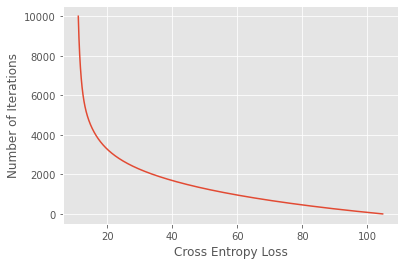

In [150]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('Cross Entropy Loss')
ax.set_ylabel('Number of Iterations')
ax.plot(cost_list,np.arange(max_iter))
plt.show()